In [1]:
# importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# reading dataset.

maindf = pd.read_csv('C:\\Users\\NEW LIFE\\Downloads\\vgsales.csv\\vgsales.csv',index_col=0)

In [22]:
# first create a copy of main data set for practice.
df = maindf.copy()

In [23]:
#preview of data.

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [24]:
# dropping some columns.
df.drop(df.columns[0:6],axis = 1,inplace=True)
df.head()

,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,
1,29.02,3.77,8.46,82.74
2,3.58,6.81,0.77,40.24
3,12.88,3.79,3.31,35.82
4,11.01,3.28,2.96,33.00
5,8.89,10.22,1.00,31.37


In [25]:
# checking null values sum.
df.isnull().sum()

EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [26]:
# total columns names in database.
df.columns

Index(['EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], dtype='object')

In [27]:
# database types. 
df.dtypes

EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [28]:
# check the total rows and columns in the dataset
df.shape

(16598, 4)

In [29]:
# number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EU_Sales      16598 non-null  float64
 1   JP_Sales      16598 non-null  float64
 2   Other_Sales   16598 non-null  float64
 3   Global_Sales  16598 non-null  float64
dtypes: float64(4)
memory usage: 648.4 KB


In [50]:
df.describe()

,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.146652,0.077782,0.048063,0.537441
std,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.060000
50%,0.020000,0.000000,0.010000,0.170000
75%,0.110000,0.040000,0.040000,0.470000
max,29.020000,10.220000,10.570000,82.740000


### Preparing X and y using pandas

In [30]:
# declaring independent variable X & dependent vriable y

X = df[['EU_Sales']]  
y = df['Global_Sales']

In [31]:
# checking shape of feature matrix X

print(X.shape)
print(y.shape)

(16598, 1)
(16598,)


### Splitting dataset into training and test data

In [33]:
# importing module for splitting the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) #unpacking, default splitting ratio is 75:25

In [34]:
# default split is 75% for training and 25% for testing

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12448, 1)
(4150, 1)
(12448,)
(4150,)


### Training model on training dataset

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
# instantiate
lr = LinearRegression()

# fit the model to the training data (learn the coefficients)
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
# get the slope and intercept of the line best fit
print("intercept",lr.intercept_)

print("coeficient",lr.coef_)

intercept 0.13089469621487948
coeficient [2.76431242]


### Making predictions on test data

In [38]:
# make predictions on the testing set
y_pred = lr.predict(X_test)   #do not use y_test

In [39]:
# the length of y_pred is
print(len(y_pred))

4150


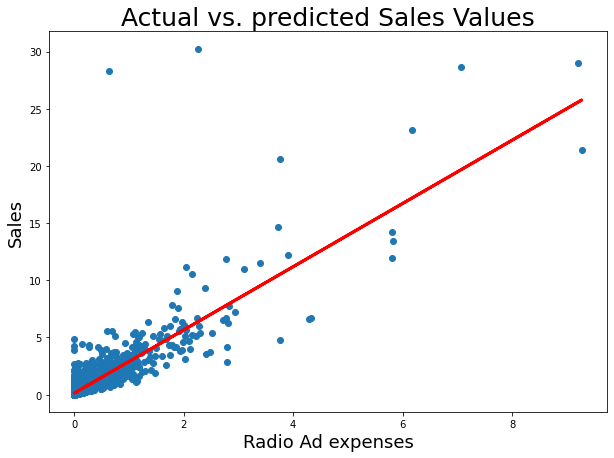

In [40]:
# Plot outputs

plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Sales Values",fontsize=25)
plt.xlabel("Radio Ad expenses",fontsize=18)
plt.ylabel("Sales", fontsize=18)

plt.scatter(x=X_test,y=y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.show()

### Checking Linear Relationship

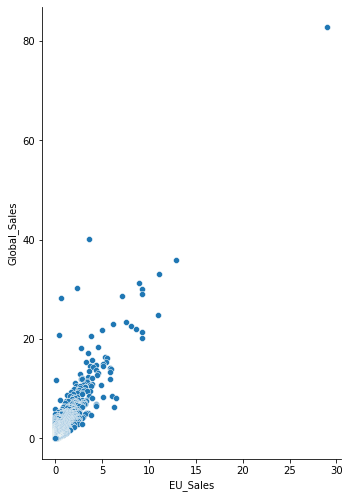

In [42]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['EU_Sales'], y_vars='Global_Sales', height=7, aspect=0.7)  # aspect controls the size graphs

### Model Evaluation

Evaluate the model on the basis of differences between the predicted values from model and actual values from test data

In [43]:
# import module to be used for model evaluation

from sklearn import metrics

In [44]:
# Mean Absolute Error (MAE)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))

Mean absolute error (MAE): 0.25091336321243396


In [45]:
# Mean Squared Error
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))

Mean square error (MSE): 0.6013676906773325


In [46]:
# Root Mean Squared Error
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root mean square error (RMSE): 0.775479007244769


### R-square value

In [47]:
print("R-squared value of predictions:",metrics.r2_score(y_test,y_pred))

R-squared value of predictions: 0.7262390334397715


### Model performance is poor because the coul dcould only explain/understands 15% of the variation.
Cross check first few Actual values and Predicted Values

In [48]:
df_check = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10].ravel()})
df_check

,Actual,Predicted
0,1.25,1.595980
1,0.34,0.296753
2,0.27,0.296753
3,0.14,0.269110
4,0.31,0.932545
5,0.10,0.130895
6,0.07,0.158538
7,0.14,0.269110
8,0.43,0.158538
9,0.02,0.130895
